## Setting
The presumption for this example is:

- ⁠Apple published new iPhone 17 series on September 9, 2025.
- That day, with positive feedback, AAPL's **behaviour score is 4**.
- **⁠⁠Lead driver** in this case would be **fast social spike caused by new product launch**.
- The **confidence level is 95%**.

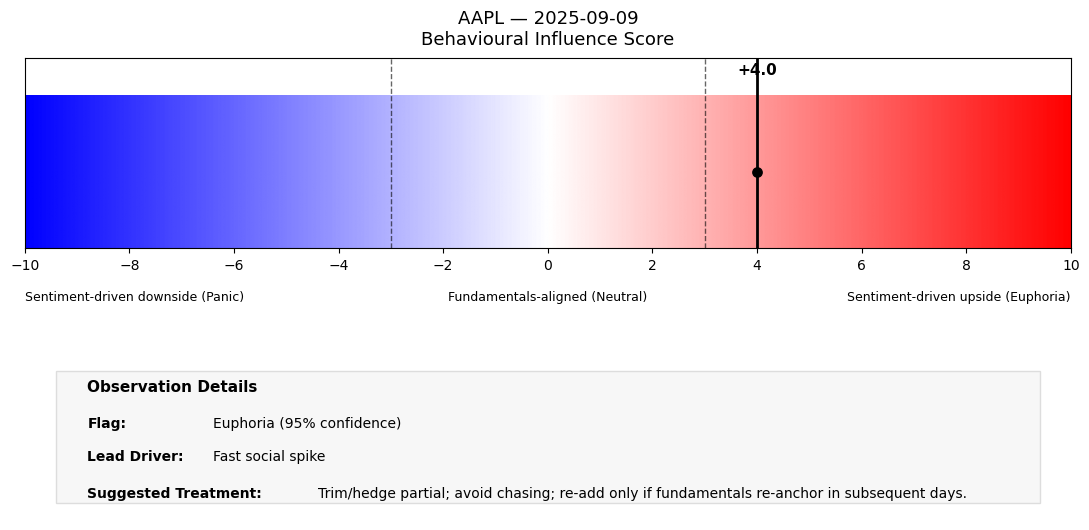

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Inputs (AAPL example)
# -----------------------------
date_str = "2025-09-09"
ticker   = "AAPL"
score    = 4.0                      # range: -10 .. +10
lead_driver = "Fast social spike"
confidence  = 95                    # 0..100

# Classification logic
if score <= -3:
    flag = "Panic"
    suggested = ("Stabilise exposure; verify fundamentals; "
                 "consider staged add only if fundamentals intact and confidence high.")
elif score >= 3:
    flag = "Euphoria"
    suggested = ("Trim/hedge partial; avoid chasing; "
                 "re-add only if fundamentals re-anchor in subsequent days.")
else:
    flag = "Neutral"
    suggested = ("No action bias; continue fundamental process; "
                 "monitor flows/social for escalation.")

# Clamp inputs
score = float(np.clip(score, -10, 10))
confidence = float(np.clip(confidence, 0, 100))

# -----------------------------
# Figure layout (wide, airy)
# -----------------------------
fig = plt.figure(figsize=(13.5, 6))
gs = fig.add_gridspec(nrows=2, ncols=1, height_ratios=[1.15, 1.0], hspace=0.6)

ax_gauge = fig.add_subplot(gs[0, 0])   # top: gauge
ax_info  = fig.add_subplot(gs[1, 0])   # bottom: info panel
ax_info.axis("off")

# Title + subtitle
ax_gauge.set_title(f"{ticker} — {date_str}\nBehavioural Influence Score", fontsize=13, pad=10)

# -----------------------------
# Gauge: blue → white → red on [-10, 10]
# -----------------------------
grad = np.linspace(-1, 1, 1200).reshape(1, -1)
ax_gauge.imshow(grad, extent=(-10, 10, 0, 1), aspect="auto", cmap="bwr", vmin=-1, vmax=1)

# Regime cut lines
for x in (-3, 3):
    ax_gauge.axvline(x, color="k", lw=1, ls="--", alpha=0.6)

# Score marker
ax_gauge.axvline(score, color="black", lw=2, zorder=3)
ax_gauge.scatter([score], [0.5], s=45, color="black", zorder=4)
ax_gauge.text(score, 1.12, f"{score:+.1f}", ha="center", va="bottom", fontsize=11, weight="bold")

# End/center labels below the bar
ax_gauge.text(-10, -0.28, "Sentiment-driven downside (Panic)",   ha="left",   va="top", fontsize=9)
ax_gauge.text(0,   -0.28, "Fundamentals-aligned (Neutral)",      ha="center", va="top", fontsize=9)
ax_gauge.text(10,  -0.28, "Sentiment-driven upside (Euphoria)",  ha="right",  va="top", fontsize=9)

# Axis styling
ax_gauge.set_xlim(-10, 10)
ax_gauge.set_ylim(0, 1.25)
ax_gauge.set_yticks([])
ax_gauge.set_xticks(np.arange(-10, 11, 2))

# -----------------------------
# Observation Details (full-width card)
# -----------------------------
card_x, card_y, card_w, card_h = 0.03, 0.10, 0.94, 0.80
ax_info.add_patch(plt.Rectangle((card_x, card_y), card_w, card_h,
                                transform=ax_info.transAxes, fc="#f7f7f7", ec="#dddddd"))

# Layout params
left_x   = card_x + 0.03
right_x  = card_x + 0.55
top_y    = card_y + card_h - 0.12
line_gap = 0.20

# Header
ax_info.text(left_x, top_y, "Observation Details", fontsize=11, weight="bold",
             transform=ax_info.transAxes)

# Row 1: Flag with confidence inline
y = top_y - 0.22
ax_info.text(left_x, y, "Flag:", fontsize=10, weight="bold", transform=ax_info.transAxes)
ax_info.text(left_x + 0.12, y, f"{flag} ({confidence:.0f}% confidence)",
             fontsize=10, transform=ax_info.transAxes)

# Row 2: Lead Driver
y -= line_gap
ax_info.text(left_x, y, "Lead Driver:", fontsize=10, weight="bold", transform=ax_info.transAxes)
ax_info.text(left_x + 0.12, y, lead_driver, fontsize=10, transform=ax_info.transAxes)

# Row 3: Suggested Treatment (spans most of the card width)
y -= line_gap * 1.1
ax_info.text(left_x, y, "Suggested Treatment:", fontsize=10, weight="bold",
             transform=ax_info.transAxes)
ax_info.text(left_x + 0.22, y, suggested, fontsize=10, transform=ax_info.transAxes, wrap=True)

plt.show()
